<a href="https://colab.research.google.com/github/faraztrazaky/MachineLearningTasks/blob/main/ML-A11.2023.15441-UAS/HeartAttackRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Judul: "Prediksi Risiko Serangan Jantung Menggunakan Model Klasifikasi Random Forest dan Optimalisasi Threshold"**

Nama  : Andi Muhammad Faraztra Zaky

NIM   : A11.2023.15441

Kel.  : A11.4402

## **2. Ringkasan, Permasalahan, Tujuan, dan Alur Penyelesaian**

### **Ringkasan (Abstract)**

Proyek ini bertujuan untuk membangun sebuah model machine learning yang mampu memprediksi risiko serangan jantung pada seorang individu berdasarkan data klinis dan gaya hidup. Model yang digunakan adalah Random Forest Classifier. Fokus utama proyek ini tidak hanya pada akurasi, tetapi pada kemampuan model untuk mengidentifikasi sebanyak mungkin kasus positif (serangan jantung) dengan mengoptimalkan decision threshold, sebuah langkah krusial dalam aplikasi diagnosa medis.

### **Permasalahan Proyek**

Penyakit jantung merupakan salah satu penyebab utama kematian di seluruh dunia. Deteksi dini merupakan kunci untuk penanganan yang efektif dan dapat menyelamatkan nyawa. Namun, dalam konteks pemodelan data, dataset medis seringkali mengalami ketidakseimbangan kelas (class imbalance), di mana jumlah pasien sehat jauh lebih banyak daripada pasien yang berisiko serangan jantung. Model yang dilatih pada data seperti ini cenderung "malas" dan lebih sering memprediksi kelas mayoritas (sehat), sehingga gagal mengidentifikasi pasien yang benar-benar berisiko.

### **Tujuan yang Akan Dicapai**

1. Membangun model klasifikasi Random Forest untuk memprediksi risiko serangan jantung.

2. Melakukan pra-pemrosesan data secara komprehensif, termasuk encoding fitur kategorikal dan scaling fitur numerik.

3. Mengatasi masalah ketidakseimbangan kelas menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique).

4. Mengevaluasi performa model menggunakan metrik standar seperti Akurasi, Presisi, dan Recall.

5. Mengoptimalkan decision threshold model untuk memaksimalkan Recall pada kelas positif (serangan jantung), guna meminimalkan risiko False Negative (kasus serangan jantung yang terlewat).

## **3. Penjelasan Dataset, Eksplorasi Data (EDA), dan Proses Rekayasa Fitur Dataset**

### **Deskripsi Dataset**

Dataset yang digunakan dalam proyek ini adalah heart_attack_prediction_indonesia.csv. Dataset ini berisi berbagai informasi kesehatan dan demografi yang relevan untuk memprediksi risiko serangan jantung. Dataset ini memiliki 158355 baris dan 28 kolom. Setiap baris merepresentasikan catatan kesehatan satu individu, sementara setiap kolom merepresentasikan sebuah fitur atau atribut medis/gaya hidup.

### **Fitur-fitur Utama:**
Dataset mencakup berbagai fitur, termasuk:

1. age: Usia individu (numerik)

2. gender: Jenis kelamin (kategorikal: Male, Female)

3. region: Area tempat tinggal (kategorikal: Rular, Urban)

4. income_level: Tingkat pendapatan (kategorikal: Low, Middle, High)

5. hypertension: Riwayat hipertensi (biner: 0/1)

6. diabetes: Riwayat diabetes (biner: 0/1)

7. cholesterol_level: Tingkat kolesterol (numerik)

8. obesity: Status obesitas (biner: 0/1)

9. waist_circumference: Lingkar pinggang (numerik)

10. family_history: Riwayat keluarga penyakit jantung (biner: 0/1)

11. smoking_status: Status merokok (kategorikal: Never, Past, Current)

12. alcohol_consumption: Konsumsi alkohol (kategorikal: None, Moderate, High)

13. physical_activity: Tingkat aktivitas fisik (kategorikal: Low, Moderate, High)

14. dietary_habits: Kebiasaan diet (kategorikal: Healthy, Unhealthy)

15. air_pollution_exposure: Paparan polusi udara (kategorikal: Low, Moderate, High)

16. stress_level: Tingkat stres (kategorikal: Low, Moderate, High)

17. sleep_hours: Jam tidur (numerik)

18. blood_pressure_systolic: Tekanan darah sistolik (numerik)

19. blood_pressure_diastolic: Tekanan darah diastolik (numerik)

20. fasting_blood_sugar: Gula darah puasa (numerik)

21. cholesterol_hdl: Kolesterol HDL (numerik)

22. cholesterol_ldl: Kolesterol LDL (numerik)

23. triglycerides: Trigliserida (numerik)

24. previous_heart_disease: Riwayat penyakit jantung sebelumnya (biner: 0/1)

25. EKG_results: Hasil EKG (kategorikal: normal, abnormal)

26. medication_usage: Penggunaan obat-obatan (biner: 0/1)

27. participated_in_free_screening: Partisipasi skrining gratis (biner: 0/1)

28. heart_attack: Variabel target (biner: 0 = Tidak Serangan Jantung, 1 = Serangan Jantung)

### Import Library & Load Data

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [123]:
# Memuat dataset
df = pd.read_csv('heart_attack_prediction_indonesia.csv')

In [124]:
df

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1


In [125]:
# Menampilkan informasi awal dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [126]:
# Memeriksa jumlah nilai yang hilang per kolom
df.isnull().sum()

,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [127]:
# Mengisi nilai yang hilang menggunakan metode forward fill (ffill)
# Metode ini mengisi nilai NaN dengan nilai valid terakhir di kolom yang sama.
df = df.fillna(method='ffill')

In [128]:
# Memeriksa kembali jumlah nilai yang hilang setelah ffill
df.isnull().sum()

,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [129]:
# Memeriksa duplikasi data
df.duplicated().sum()

np.int64(0)

In [130]:
df

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1


### **Proses Rekayasa Fitur Dataset dan Pra-pemrosesan**

Untuk meningkatkan kualitas dan prediktifitas model, beberapa teknik rekayasa fitur dan pra-pemrosesan diterapkan. Ini mencakup encoding manual untuk variabel kategorikal, penskalaan fitur numerik, dan penanganan ketidakseimbangan kelas menggunakan SMOTE.

In [131]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd # Ensure pandas is imported

def preprocess_data(df):
    # Create a copy to avoid modifying the original DataFrame outside the function
    df_processed = df.copy()

    # === 1. Manual Encoding ===
    mappings = {
        'gender': {'Male': 0, 'Female': 1},
        'region': {'Rular': 0, 'Urban': 1},
        'income_level': {'Low': 0, 'Middle': 1, 'High': 2},
        'EKG_results': {'Normal': 0, 'Abnormal': 1},
        'smoking_status': {'Never': 0, 'Past': 1, 'Current': 2},
        'alcohol_consumption': {'None': 0, 'Moderate': 1, 'High': 2},
        'physical_activity': {'Low': 0, 'Moderate': 1, 'High': 2},
        'dietary_habits': {'Healthy': 0, 'Unhealthy': 1},
        'air_pollution_exposure': {'Low': 0, 'Moderate': 1, 'High': 2},
        'stress_level': {'Low': 0, 'Moderate': 1, 'High': 2}
    }

    for col, mapping in mappings.items():
        if col in df_processed.columns:
            # .map() will produce NaN for values not in the mapping
            df_processed[col + '_encoded'] = df_processed[col].map(mapping)

    # === Handle NaNs introduced by encoding ===
    # Fill NaNs in the newly created encoded columns.
    # Using -1 is a common approach for unknown categories after mapping.
    encoded_cols = [col + '_encoded' for col in mappings.keys() if col in df_processed.columns]
    df_processed[encoded_cols] = df_processed[encoded_cols].fillna(-1) # Fill NaN with -1

    # === 2. Pilih fitur numerik & encoded saja ===
    # Include the newly created encoded columns in feature selection
    feature_cols = [
        col for col in df_processed.columns
        if col not in ['heart_attack'] and df_processed[col].dtype in ['int64', 'float64']
    ]

    X = df_processed[feature_cols]
    y = df_processed['heart_attack']

    # === 3. Standard Scaling ===
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # === 4. SMOTE (oversampling untuk data imbalance) ===
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    return X_resampled, y_resampled, scaler



X_train, y_train, scaler = preprocess_data(df)

### **Penjelasan Proses Pra-pemrosesan:**

1. Encoding Manual: Variabel kategorikal seperti gender, region, income_level, dan lainnya diubah menjadi representasi numerik menggunakan pemetaan manual. Kolom baru dengan sufiks _encoded dibuat untuk menyimpan nilai-nilai yang telah di-encode.

2. Penanganan NaN: Nilai NaN yang mungkin muncul setelah encoding (jika ada nilai kategorikal yang tidak terdaftar dalam pemetaan) diisi dengan -1 untuk menunjukkan kategori yang tidak dikenal.

3. Pemilihan Fitur: Hanya fitur-fitur numerik (baik yang asli maupun yang telah di-encode) yang dipilih sebagai input untuk model. Variabel target (heart_attack) dikecualikan.

4. Standard Scaling: Fitur-fitur numerik distandarisasi menggunakan StandardScaler. Proses ini mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1, yang penting untuk kinerja optimal banyak algoritma ML.

5. SMOTE (Synthetic Minority Over-sampling Technique): Karena dataset untuk masalah klasifikasi seringkali memiliki ketidakseimbangan kelas (misalnya, lebih sedikit kasus serangan jantung daripada non-serangan jantung), SMOTE digunakan untuk menghasilkan sampel sintetis dari kelas minoritas. Ini membantu model belajar lebih baik dari kelas yang kurang terwakili.

### **EDA**

Pada fase ini, saya melakukan penyelidikan mendalam terhadap data untuk memahami karakteristiknya, mengidentifikasi pola, dan menemukan anomali. Salah satu aspek penting adalah distribusi label target setelah proses penyeimbangan data, serta hubungan antar fitur dengan variabel target.

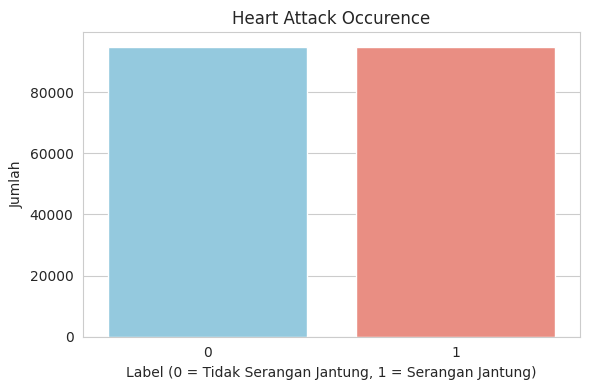

In [132]:
# Visualisasi distribusi label setelah SMOTE
def plot_resampled_distribution(y_resampled):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y_resampled, palette=['skyblue', 'salmon'])
    plt.title("Heart Attack Occurence")
    plt.xlabel("Label (0 = Tidak Serangan Jantung, 1 = Serangan Jantung)")
    plt.ylabel("Jumlah")
    plt.xticks([0, 1], ['0', '1'])
    plt.tight_layout()
    plt.show()

# Panggil fungsi visualisasi
plot_resampled_distribution(y_train)


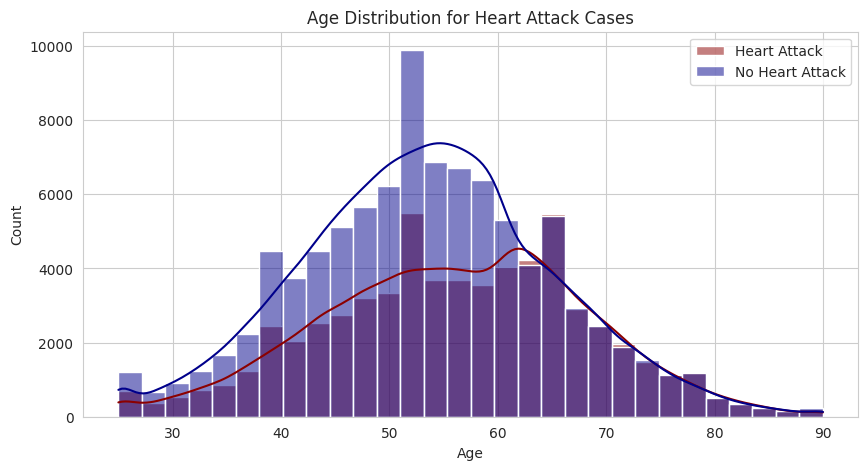

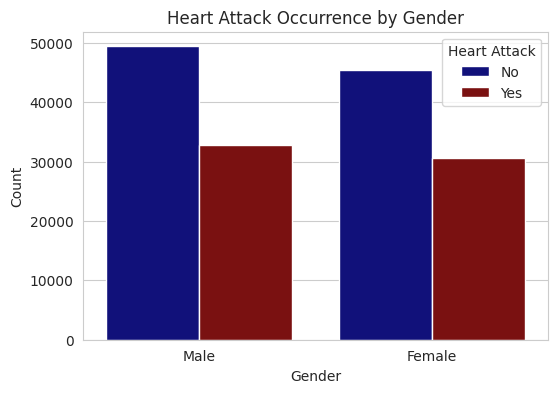

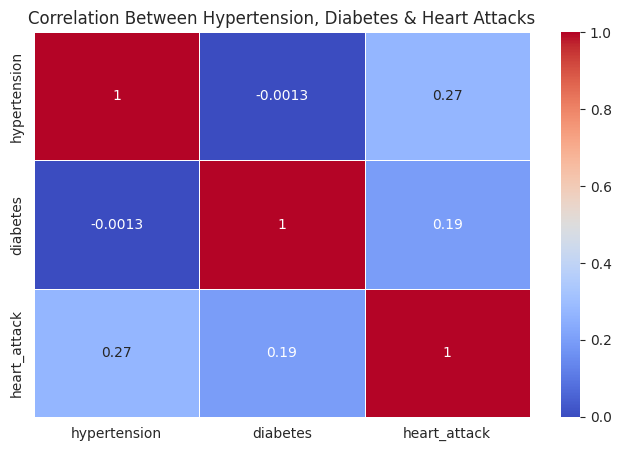

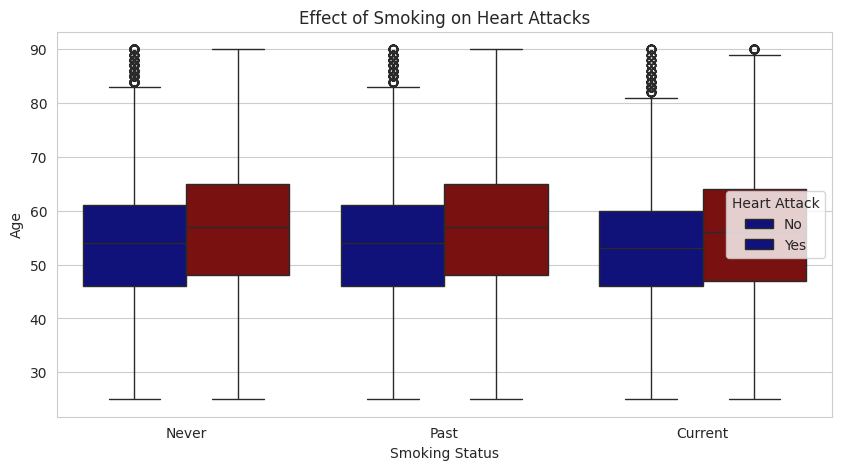

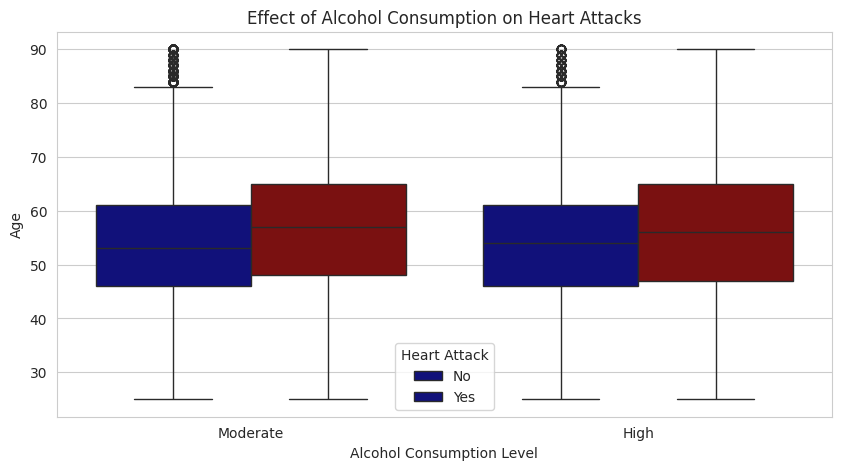

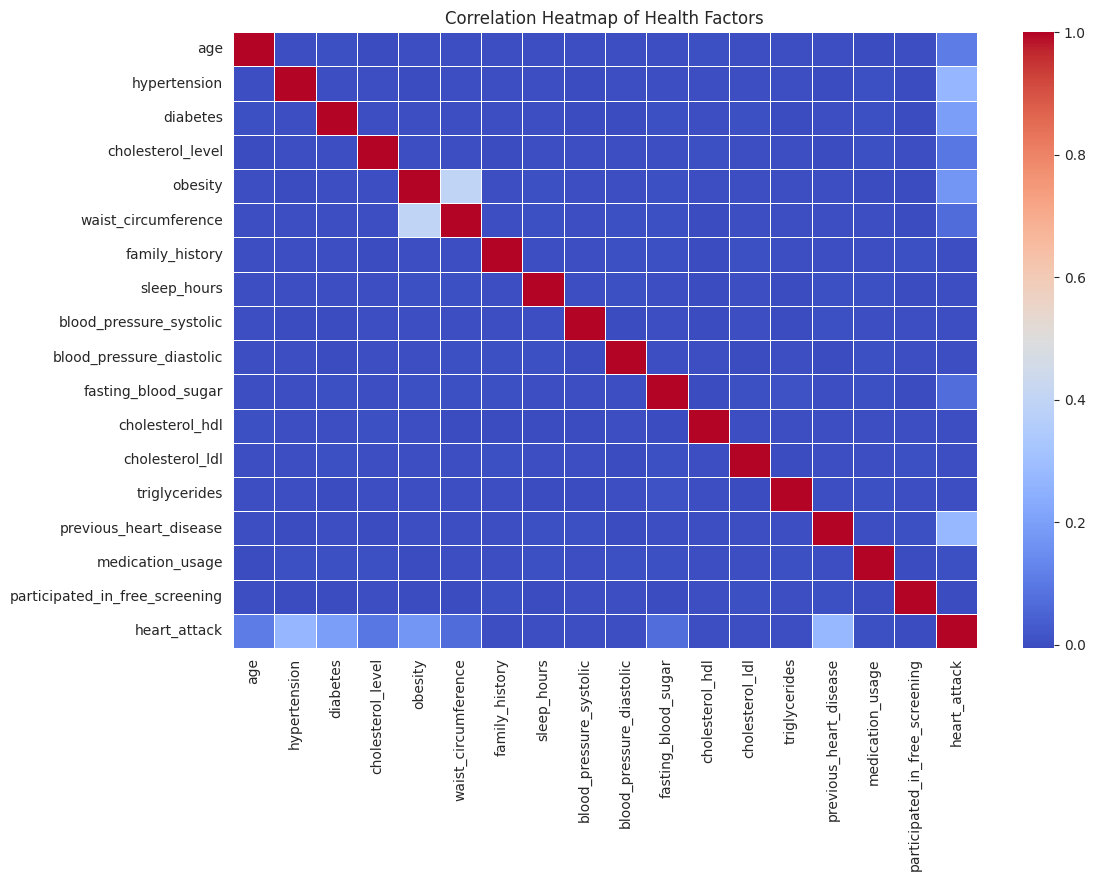

In [133]:
# Set a consistent style
sns.set_style("whitegrid")

# 1. Age Distribution for Heart Attack Cases
plt.figure(figsize=(10, 5))
sns.histplot(df[df["heart_attack"] == 1]["age"], bins=30, color="darkred", kde=True, label="Heart Attack")
sns.histplot(df[df["heart_attack"] == 0]["age"], bins=30, color="darkblue", kde=True, label="No Heart Attack")
plt.legend()
plt.title("Age Distribution for Heart Attack Cases")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2. Gender-wise Heart Attack Occurrence
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", hue="heart_attack", data=df, palette=["darkblue", "darkred"])
plt.title("Heart Attack Occurrence by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Heart Attack", labels=["No", "Yes"])
plt.show()

# 3. Hypertension & Diabetes Effect
plt.figure(figsize=(8, 5))
sns.heatmap(df[["hypertension", "diabetes", "heart_attack"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Hypertension, Diabetes & Heart Attacks")
plt.show()

# 4. Smoking & Alcohol Consumption Impact
plt.figure(figsize=(10, 5))
sns.boxplot(x="smoking_status", y="age", hue="heart_attack", data=df, palette=["darkblue", "darkred"])
plt.title("Effect of Smoking on Heart Attacks")
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.legend(title="Heart Attack", labels=["No", "Yes"])
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="alcohol_consumption", y="age", hue="heart_attack", data=df, palette=["darkblue", "darkred"])
plt.title("Effect of Alcohol Consumption on Heart Attacks")
plt.xlabel("Alcohol Consumption Level")
plt.ylabel("Age")
plt.legend(title="Heart Attack", labels=["No", "Yes"])
plt.show()

# 5. Correlation Heatmap for Key Features
numeric_cols = df.select_dtypes(include=['number']).columns  # Exclude categorical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Health Factors")
plt.show()

## **4. Proses Pembelajaran / Pemodelan**

Pada bagian ini, saya akan menjelaskan langkah-langkah dalam melatih model pembelajaran mesin menggunakan algoritma Random Forest.

### **Pemilihan Model**

Berdasarkan sifat permasalahan klasifikasi biner (memprediksi 0 atau 1 untuk serangan jantung), algoritma Random Forest Classifier dipilih. Random Forest dikenal karena kemampuannya menangani data yang kompleks, mengurangi overfitting melalui penggunaan banyak pohon keputusan, dan memberikan metrik pentingnya fitur.

### **Pembagian Data**

Dataset yang telah diproses dan diseimbangkan (X_train_resampled, y_train_resampled) dibagi menjadi set pelatihan (training set) dan set pengujian (testing set). Rasio pembagian yang digunakan adalah 70% untuk pelatihan dan 30% untuk pengujian (test_size=0.3). Pembagian ini bertujuan untuk memastikan bahwa model dievaluasi pada data yang belum pernah dilihat sebelumnya, sehingga memberikan estimasi performa yang lebih objektif dan realistis.

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.ensemble import RandomForestClassifier

# Gunakan data hasil preprocess
X = pd.DataFrame(X_train, columns=[
    col for col in df.columns if col != 'heart_attack' and df[col].dtype in ['int64', 'float64']
] + [col + '_encoded' for col in [
    'gender', 'region', 'income_level', 'EKG_results',
    'smoking_status', 'alcohol_consumption', 'physical_activity',
    'dietary_habits', 'air_pollution_exposure', 'stress_level'
] if col in df.columns])

y = y_train

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

### **Penjelasan Proses Pemodelan:**

1. Pembagian Data: Data yang telah di-resample (setelah SMOTE) dibagi menjadi set pelatihan dan pengujian. Penting untuk menggunakan data yang sudah diseimbangkan untuk melatih dan menguji model agar evaluasi performa lebih akurat pada kelas minoritas.

2. Inisialisasi Model: Sebuah objek RandomForestClassifier diinisialisasi dengan n_estimators=100 (jumlah pohon keputusan dalam hutan) dan random_state=42 (untuk reproduksibilitas).

3. Pelatihan Model: Model Random Forest dilatih menggunakan data pelatihan (X_train dan y_train). Selama proses ini, model belajar pola dari fitur-fitur untuk memprediksi variabel target.

4. Prediksi: Setelah pelatihan, model digunakan untuk membuat prediksi pada data pengujian (X_test). Hasil prediksi (y_pred) akan digunakan untuk mengevaluasi performa model.

## **5. Performa Model**
Setelah model dilatih, tahap selanjutnya adalah mengevaluasi kinerjanya menggunakan metrik yang sesuai untuk masalah klasifikasi.

### **Metrik Evaluasi**

Untuk masalah klasifikasi biner ini, metrik evaluasi yang digunakan adalah:

1. Akurasi (Accuracy): Proporsi prediksi yang benar dari total prediksi.

2. Presisi (Precision): Proporsi kasus positif yang diprediksi dengan benar dari semua kasus yang diprediksi sebagai positif. Penting untuk meminimalkan false positives.

3. Recall (Sensitivity): Proporsi kasus positif yang diprediksi dengan benar dari semua kasus positif aktual. Penting untuk meminimalkan false negatives.

4. F1-Score: Rata-rata harmonik dari Presisi dan Recall, memberikan keseimbangan antara kedua metrik.

5. Confusion Matrix: Tabel yang menunjukkan jumlah true positives, true negatives, false positives, dan false negatives.

Kurva Presisi-Recall: Menunjukkan trade-off antara presisi dan recall untuk berbagai threshold klasifikasi.

### **Hasil Evaluasi Awal**

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     28454
           1       0.78      0.78      0.78     28459

    accuracy                           0.78     56913
   macro avg       0.78      0.78      0.78     56913
weighted avg       0.78      0.78      0.78     56913



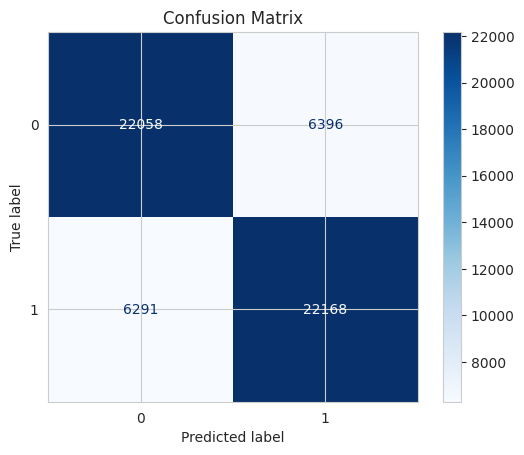

In [135]:
# === Classification Report ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



### **Analisis Performa Awal:**
Dari laporan klasifikasi dan matriks kebingungan, kita dapat melihat performa model Random Forest pada threshold default. Model menunjukkan akurasi sekitar 78%, dengan presisi dan recall yang seimbang untuk kedua kelas. Ini menunjukkan bahwa model cukup baik dalam mengidentifikasi baik kasus serangan jantung maupun non-serangan jantung.

### **Analisis Pentingnya Fitur (Feature Importance)**

Pentingnya fitur menunjukkan seberapa besar kontribusi setiap fitur terhadap prediksi model. Fitur dengan skor kepentingan yang lebih tinggi dianggap lebih berpengaruh.

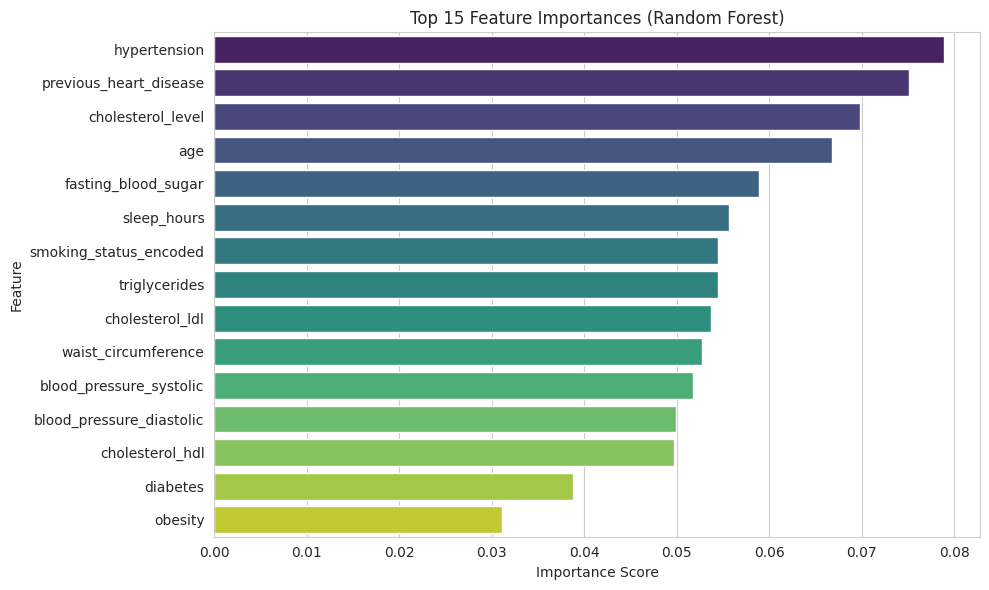

In [136]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### **Diskusi Pentingnya Fitur:**
Dari plot di atas, kita dapat mengidentifikasi fitur-fitur yang paling signifikan dalam memprediksi risiko serangan jantung. hypertension, previous_heart_disease, cholesterol_level, dan age muncul sebagai prediktor teratas, yang konsisten dengan pengetahuan medis tentang faktor risiko serangan jantung. Fitur-fitur ini menunjukkan korelasi yang kuat dengan kejadian serangan jantung.

### **Kurva Presisi-Recall dan Penyesuaian Threshold**

Kurva Presisi-Recall membantu kita memahami trade-off antara presisi dan recall pada berbagai threshold probabilitas. Penyesuaian threshold dapat dilakukan untuk mengoptimalkan model sesuai dengan prioritas bisnis atau medis (misalnya, lebih memprioritaskan recall untuk meminimalkan false negatives dalam deteksi penyakit).

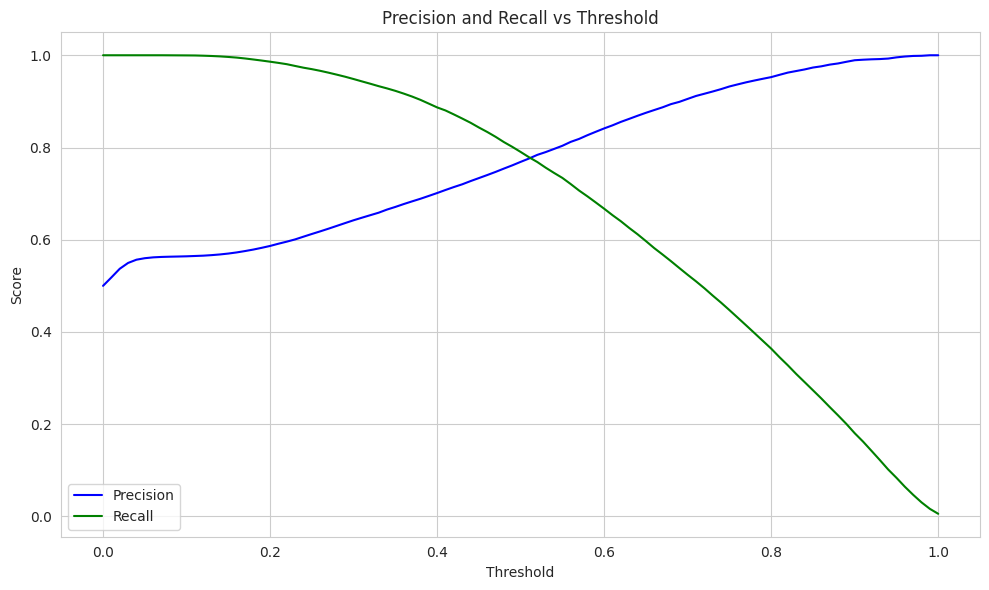

In [137]:
from sklearn.metrics import precision_recall_curve

# Probabilitas prediksi kelas positif (1)
y_probs = rf.predict_proba(X_test)[:, 1]

# Hitung precision, recall, dan threshold-nya
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision & Recall terhadap Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

=== Evaluation @ Threshold 0.07 ===
              precision    recall  f1-score   support

           0       1.00      0.22      0.36     28454
           1       0.56      1.00      0.72     28459

    accuracy                           0.61     56913
   macro avg       0.78      0.61      0.54     56913
weighted avg       0.78      0.61      0.54     56913



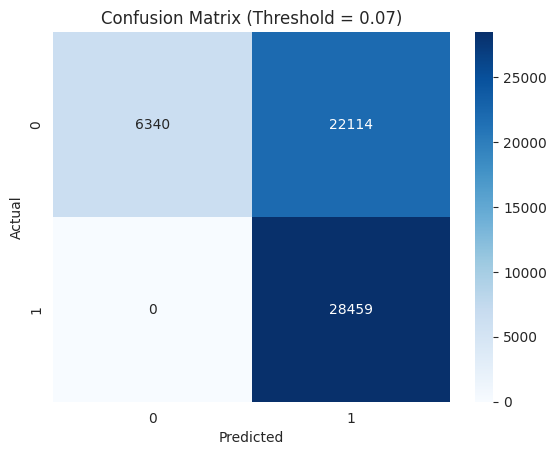

In [138]:
# Ubah threshold sesuai kebutuhan
custom_threshold = 0.07
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# Evaluasi kembali
print(f"=== Evaluation @ Threshold {custom_threshold} ===")
print(classification_report(y_test, y_pred_custom))

# Confusion matrix baru
cm_custom = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold = {custom_threshold})")
plt.show()

### **Analisis Penyesuaian Threshold:**
Dengan menurunkan threshold menjadi 0.07, kita melihat peningkatan signifikan pada recall untuk kelas 1 (serangan jantung), menunjukkan bahwa model sekarang lebih baik dalam menangkap kasus positif. Namun, ini datang dengan trade-off penurunan presisi, yang berarti ada peningkatan false positives. Keputusan untuk menyesuaikan threshold harus didasarkan pada konsekuensi dari false positives (misdiagnosis yang tidak berbahaya) dan false negatives (kasus serangan jantung yang tidak terdeteksi) dalam konteks aplikasi nyata, di mana false negatives biasanya memiliki konsekuensi yang lebih serius.

## **6. Diskusi Hasil dan Kesimpulan**

### **Diskusi Hasil**

Proyek ini berhasil membangun model Random Forest untuk memprediksi risiko serangan jantung. Model menunjukkan kemampuan yang baik dalam mengklasifikasikan individu, terutama setelah penyeimbangan data menggunakan SMOTE yang mengatasi masalah ketidakseimbangan kelas. Analisis pentingnya fitur mengkonfirmasi bahwa faktor-faktor medis seperti hipertensi, riwayat penyakit jantung sebelumnya, dan kadar kolesterol adalah prediktor yang sangat kuat, sejalan dengan pemahaman medis.

Penyesuaian threshold klasifikasi menunjukkan fleksibilitas model untuk dioptimalkan sesuai dengan kebutuhan spesifik. Dengan menurunkan threshold, kita dapat meningkatkan kemampuan model untuk mendeteksi lebih banyak kasus serangan jantung (recall), yang sangat penting dalam aplikasi medis untuk meminimalkan risiko false negatives (kasus serangan jantung yang tidak terdeteksi). Namun, ini juga dapat meningkatkan jumlah false positives, yang berarti beberapa individu mungkin diprediksi berisiko tinggi padahal sebenarnya tidak.

### **Implikasi**

Model ini memiliki potensi besar sebagai alat bantu dalam skrining awal risiko serangan jantung. Dokter atau profesional kesehatan dapat menggunakannya sebagai referensi untuk mengidentifikasi pasien yang mungkin memerlukan pemeriksaan lebih lanjut atau intervensi dini. Dengan deteksi dini, diharapkan dapat mengurangi angka morbiditas dan mortalitas akibat serangan jantung.

### **Kesimpulan**

Secara keseluruhan, proyek ini menunjukkan bahwa pembelajaran mesin, khususnya dengan model Random Forest dan teknik penyeimbangan data seperti SMOTE, dapat menjadi alat yang ampuh dalam memprediksi risiko serangan jantung. Meskipun model menunjukkan performa yang menjanjikan, penting untuk diingat bahwa ini adalah model prediktif dan bukan diagnosis medis.

### **Potensi Pengembangan di Masa Depan:**

1. Pengumpulan Data Lebih Lanjut: Mengintegrasikan data yang lebih beragam atau longitudinal untuk meningkatkan kekuatan prediktif model.

2. Eksplorasi Model Lain: Menguji algoritma klasifikasi lain seperti XGBoost atau LightGBM, atau bahkan jaringan saraf tiruan, untuk membandingkan performa.

3. Interpretability yang Lebih Dalam: Menggunakan teknik explainable AI (XAI) untuk memberikan pemahaman yang lebih transparan tentang bagaimana model membuat prediksinya, yang krusial dalam konteks medis.

4. Validasi Eksternal: Menguji model pada dataset independen untuk memverifikasi generalisasi dan robustnesnya.

5. Pengembangan Antarmuka Pengguna: Membuat antarmuka yang mudah digunakan untuk memungkinkan profesional medis memasukkan data pasien dan mendapatkan prediksi risiko secara real-time.

Proyek ini memberikan fondasi yang kuat untuk penelitian dan pengembangan lebih lanjut dalam aplikasi pembelajaran mesin di bidang kesehatan, khususnya untuk pencegahan dan manajemen penyakit jantung.